In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("BikeSharing.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.shape

(17379, 17)

In [5]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
bike=data.rename(columns={"instant":"id","dteday":"date","yr":"year","mnth":"month","hr":"hour","weathersit":"weather_cond","hum":"humidity","cnt":"total_count"})

In [8]:
bike.columns

Index(['id', 'date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather_cond', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count'],
      dtype='object')

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
id              17379 non-null int64
date            17379 non-null object
season          17379 non-null int64
year            17379 non-null int64
month           17379 non-null int64
hour            17379 non-null int64
holiday         17379 non-null int64
weekday         17379 non-null int64
workingday      17379 non-null int64
weather_cond    17379 non-null int64
temp            17379 non-null float64
atemp           17379 non-null float64
humidity        17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
total_count     17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
bike["date"]=bike["date"].astype("datetime64")

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
id              17379 non-null int64
date            17379 non-null datetime64[ns]
season          17379 non-null int64
year            17379 non-null int64
month           17379 non-null int64
hour            17379 non-null int64
holiday         17379 non-null int64
weekday         17379 non-null int64
workingday      17379 non-null int64
weather_cond    17379 non-null int64
temp            17379 non-null float64
atemp           17379 non-null float64
humidity        17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
total_count     17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [12]:
#To check duplicate values
bike.duplicated().sum()

0

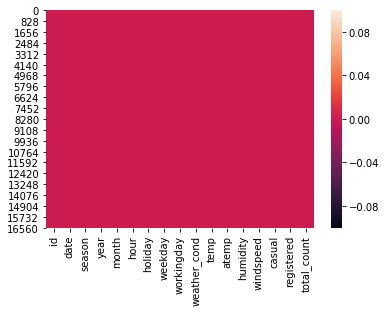

In [13]:
#To check missing value
sns.heatmap(bike.isnull())

In [14]:
bike.isnull().sum()

id              0
date            0
season          0
year            0
month           0
hour            0
holiday         0
weekday         0
workingday      0
weather_cond    0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
total_count     0
dtype: int64

Check Correlation

In [15]:
bike.corr()

,id,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,total_count
id,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather_cond,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Exploring Data Variables

In [16]:
print("season: ",bike["season"].unique())

season:  [1 2 3 4]


In [17]:
bike.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

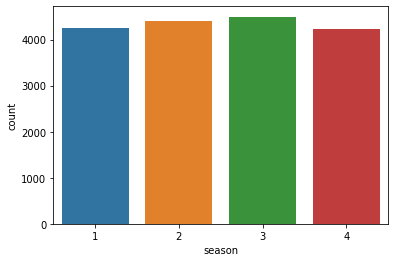

In [18]:
sns.countplot(x='season',data=bike)

In [19]:
print("holiday: ",bike["holiday"].unique())

holiday:  [0 1]


In [20]:
bike.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

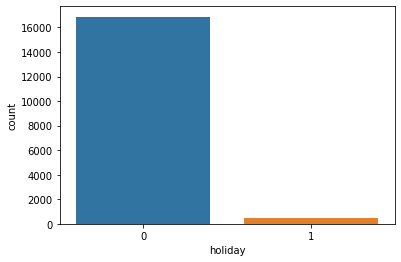

In [21]:
sns.countplot(x='holiday',data=bike)

In [22]:
print("weekday: ",bike["weekday"].unique())

weekday:  [6 0 1 2 3 4 5]


In [23]:
bike.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

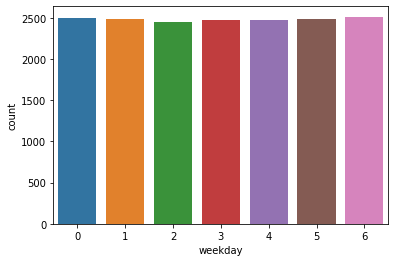

In [24]:
sns.countplot(x='weekday',data=bike)

In [25]:
print("month: ",bike["month"].unique())

month:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [26]:
bike.month.value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: month, dtype: int64

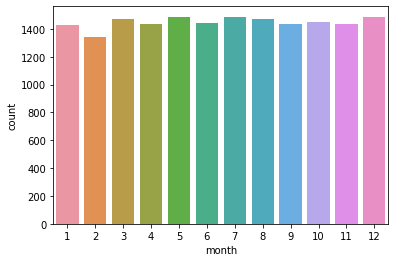

In [27]:
sns.countplot(x='month',data=bike)

In [28]:
print("year: ",bike["year"].unique())

year:  [0 1]


In [29]:
bike.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

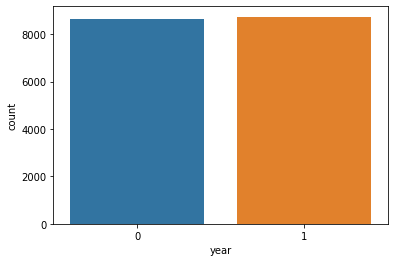

In [30]:
sns.countplot(x='year',data=bike)

In [31]:
print("workingday: ",bike["workingday"].unique())

workingday:  [0 1]


In [32]:
bike.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

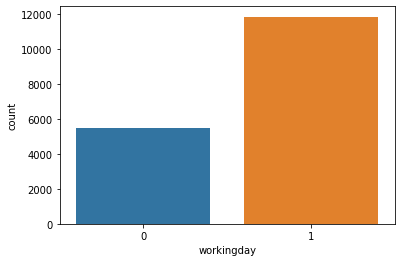

In [33]:
sns.countplot(x='workingday',data=bike)

In [34]:
print("weather_cond: ",bike["weather_cond"].unique())

weather_cond:  [1 2 3 4]


In [35]:
bike.weather_cond.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather_cond, dtype: int64

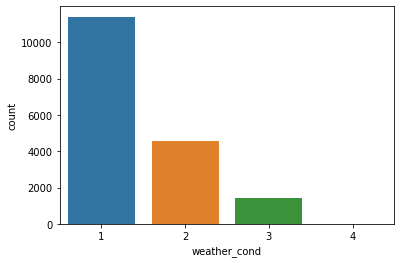

In [36]:
sns.countplot(x='weather_cond',data=bike)

Bivariant Analysis

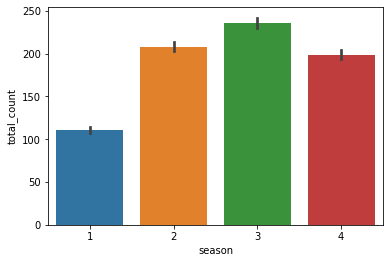

In [37]:
sns.barplot(x='season',y='total_count',data=bike)

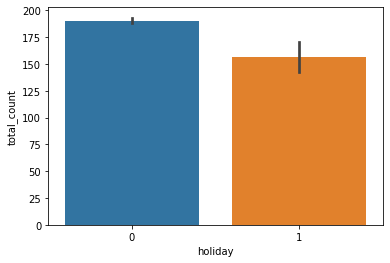

In [38]:
sns.barplot(x='holiday',y='total_count',data=bike)

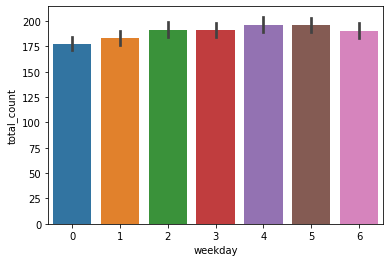

In [39]:
sns.barplot(x='weekday',y='total_count',data=bike)

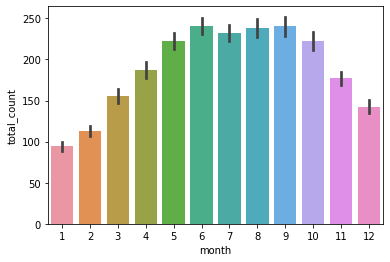

In [40]:
sns.barplot(x='month',y='total_count',data=bike)

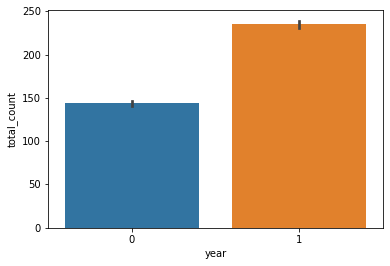

In [41]:
sns.barplot(x='year',y='total_count',data=bike)

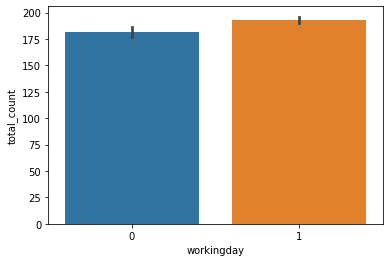

In [42]:
sns.barplot(x='workingday',y='total_count',data=bike)

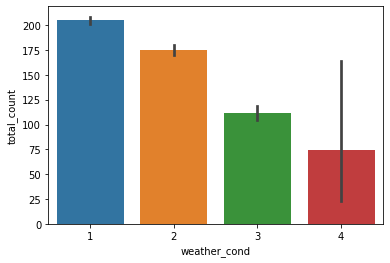

In [43]:
sns.barplot(x='weather_cond',y='total_count',data=bike)

Summary Statistic

In [44]:
bike.describe()

,id,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [45]:
final_bike=bike.loc[:,["workingday","temp","year","month","hour","weekday","total_count"]]
final_bike.head()

,workingday,temp,year,month,hour,weekday,total_count
0,0,0.24,0,1,0,6,16
1,0,0.22,0,1,1,6,40
2,0,0.22,0,1,2,6,32
3,0,0.24,0,1,3,6,13
4,0,0.24,0,1,4,6,1


Plotting Outliers

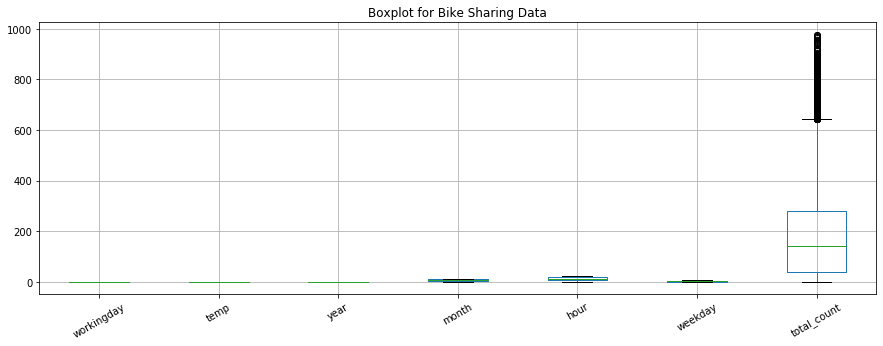

In [46]:
final_bike.plot(kind='box',grid=True,title="Boxplot for Bike Sharing Data",legend=True,rot=30,figsize=(15,5))

In [47]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(final_bike))
print(final_bike.shape)
final_bike=final_bike.loc[(z_score < 3).all(axis=1)]
print(final_bike.shape)

(17379, 7)
(17135, 7)


In [48]:
#check skewsness
final_bike.skew()

workingday    -0.765267
temp           0.010767
year           0.018094
month          0.000775
hour           0.008564
weekday       -0.003429
total_count    1.052685
dtype: float64

In [49]:
for col in final_bike.columns:
    if final_bike.skew().loc[col] > 0.55:
        final_bike[col]=np.log1p(final_bike[col])

In [50]:
final_bike.skew()

workingday    -0.765267
temp           0.010767
year           0.018094
month          0.000775
hour           0.008564
weekday       -0.003429
total_count   -0.838504
dtype: float64

In [51]:
final_bike.corr()

,workingday,temp,year,month,hour,weekday,total_count
workingday,1.000000,0.047616,-0.010974,-0.005771,-0.003460,0.036990,-0.008987
temp,0.047616,1.000000,0.028069,0.201214,0.129256,-0.001381,0.377855
year,-0.010974,0.028069,1.000000,-0.015116,-0.012779,-0.004476,0.151098
month,-0.005771,0.201214,-0.015116,1.000000,-0.007283,0.010137,0.109617
hour,-0.003460,0.129256,-0.012779,-0.007283,1.000000,-0.003051,0.562766
weekday,0.036990,-0.001381,-0.004476,0.010137,-0.003051,1.000000,0.030217
total_count,-0.008987,0.377855,0.151098,0.109617,0.562766,0.030217,1.000000


Features and Target Value

In [52]:
x=final_bike.drop(["total_count"],axis=1)
y=final_bike["total_count"]

In [53]:
x.head(2)

,workingday,temp,year,month,hour,weekday
0,0,0.24,0,1,0,6
1,0,0.22,0,1,1,6


In [54]:
y.head(2)

0    2.833213
1    3.713572
Name: total_count, dtype: float64

Standardisation

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.45329267, -1.32317162, -0.99099473, -1.59980188, -1.65704539,
         1.4882695 ],
       [-1.45329267, -1.42718749, -0.99099473, -1.59980188, -1.51277695,
         1.4882695 ],
       [-1.45329267, -1.42718749, -0.99099473, -1.59980188, -1.3685085 ,
         1.4882695 ],
       ...,
       [ 0.68809265, -1.21915576,  1.0090871 ,  1.58690189,  1.37259197,
        -0.99532009],
       [ 0.68809265, -1.21915576,  1.0090871 ,  1.58690189,  1.51686041,
        -0.99532009],
       [ 0.68809265, -1.21915576,  1.0090871 ,  1.58690189,  1.66112886,
        -0.99532009]])

Spilt Train and Test

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [57]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

Linear Regression

In [58]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000A2E0054288> 
is:  97 
and it produces 
 r2 score of  0.4443448843521701 
 mean abs error value of  0.8507264978601677 
 mean squared error value of 1.0893983948873756 
 & root mean sq error  1.0437424945298412


97

In [60]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.38285358007256404


Decision Tree Regressor

In [61]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [62]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=5)
mod(dtr,x,y)

the random state at  <function mod at 0x000000A2E0054288> 
is:  116 
and it produces 
 r2 score of  0.8091072158846523 
 mean abs error value of  0.4601980758745667 
 mean squared error value of 0.37425785663538197 
 & root mean sq error  0.6117661780740923


116

In [63]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.7783284141200242


KNeighbors Regressor

In [64]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 6}

In [65]:
knr=KNeighborsRegressor(algorithm='kd_tree',n_neighbors=6)
mod(knr,x,y)

the random state at  <function mod at 0x000000A2E0054288> 
is:  133 
and it produces 
 r2 score of  0.8765468860908183 
 mean abs error value of  0.35463692878534164 
 mean squared error value of 0.2420379482688852 
 & root mean sq error  0.491973523951122


133

In [66]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.8459426312737203


AdaBoost Regressor

In [68]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
mod(ada,x,y)

the random state at  <function mod at 0x000000A2E0054288> 
is:  127 
and it produces 
 r2 score of  0.704552110226488 
 mean abs error value of  0.6375154823106206 
 mean squared error value of 0.5792450169686174 
 & root mean sq error  0.7610814785347344


127

In [70]:
import joblib
joblib.dump(knr,"KNR for Bike_Sharing Dataset")

['KNR for Bike_Sharing Dataset']